Here's a simple breakdown of language detection:

### 1. **What is Language Detection?**
   - Language detection is identifying the language in which a piece of text is written.
   - For example, given "Hola, ¿cómo estás?" the system should detect it's in Spanish.

### 2. **How Does the Model Work?**
   - Models for language detection learn patterns and unique words or letter combinations (called "n-grams") in different languages.
   - They analyze these patterns to guess the language of new text.

### 3. **Types of Models for Language Detection**
   - **Rule-Based Models**: Use predefined rules about words or structures in each language.
   - **Statistical Models**: Learn from lots of examples in each language to find patterns.
   - **Machine Learning Models**: Use algorithms (e.g., Naive Bayes, Logistic Regression) trained on labeled text data in multiple languages.
   - **Deep Learning Models**: Use complex neural networks, such as Recurrent Neural Networks (RNNs), to detect languages with high accuracy.

### 4. **Why Do We Use Language Detection?**
   - **To Improve User Experience**: Websites and apps detect a user's language to display content in that language.
   - **For Machine Translation**: Automatic translation tools detect the input language before translating.
   - **Content Filtering**: Social media platforms detect languages to monitor and filter content.
   - **Data Organization**: Helps companies organize multilingual content for better management.

### 5. **Where is Language Detection Used?**
   - **Customer Support**: Automatically routes requests to agents who speak the detected language.
   - **Search Engines**: Provide more relevant search results based on language.
   - **Social Media**: Tag and filter posts by language for region-specific policies.
   - **E-commerce**: Adapt language on websites to fit customer locations.


In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("language.csv")

In [3]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
df.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


# concise summary:

1. **`Text` Column**:
   - 22,000 entries, with 21,859 unique texts (some repetition).
   - Most common text appears 48 times.

2. **`language` Column**:
   - 22,000 entries, covering 22 languages.
   - Most frequent language is Estonian, with 1,000 entries.

### Next Steps:
- **Check Language Balance**: Some languages may be more common than others.
- **Handle Duplicates**: Repeated texts might need filtering for balanced model training.

In [5]:
df.describe(include = 'O')

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


It looks like we have a DataFrame with 22,000 entries, containing two columns: `Text` and `language`. Here’s what each column likely represents:

- **`Text`**: Contains the text data in various languages.
- **`language`**: Contains the corresponding language label for each text entry, indicating the language of the text.

### Tips for Using This Data in Language Detection Tasks:
1. **Exploratory Data Analysis (EDA)**:
   - We can check for unique values in the `language` column to see how many languages are in our dataset.
   - We can analyze the distribution of languages to see if it's balanced or imbalanced (useful for training).

2. **Data Preprocessing**:
   - **Text Cleaning**: Remove unwanted characters, punctuation, or symbols that don’t contribute to language detection.
   - **Tokenization**: Break down text into smaller units (words or characters) for model input.
   - **Encoding Labels**: If using machine learning, encode the `language` column as numeric labels.

3. **Model Selection**:
   - We can use models like **Naive Bayes** or **Logistic Regression** for simple language detection.
   - For better accuracy, consider **deep learning models** like LSTMs or Transformer-based models (e.g., BERT), which handle language nuances well.

4. **Usage Scenarios**:
   - This dataset can help us train or fine-tune a language detection model for multilingual applications, such as customer support, social media filtering, or content localization.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [7]:
df.shape

(22000, 2)

In [8]:
df.size

44000

In [9]:
df.dtypes

Text        object
language    object
dtype: object

In [10]:
df.columns

Index(['Text', 'language'], dtype='object')

In [11]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [12]:
df.duplicated().sum()

141

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [15]:
df.language.value_counts()

language
Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: count, dtype: int64

Here's a quick overview of each language in our dataset:

1. **Estonian**: A Uralic language spoken mainly in Estonia, known for its complex grammar and vowel harmony.

2. **Swedish**: A Germanic language spoken in Sweden and parts of Finland, it shares similarities with Norwegian and Danish.

3. **Thai**: A tonal language from Thailand, using an abugida script. It's known for its distinct tones and rich vocabulary.

4. **Tamil**: A Dravidian language spoken in Tamil Nadu (India) and Sri Lanka, one of the world's oldest classical languages.

5. **Dutch**: A Germanic language spoken mainly in the Netherlands and Belgium. It’s closely related to English and German.

6. **Japanese**: Spoken in Japan, uses a combination of kanji (Chinese characters) and kana (syllabic scripts). Known for its politeness levels and sentence structures.

7. **Turkish**: A Turkic language spoken in Turkey and Cyprus. Known for vowel harmony and agglutination.

8. **Latin**: An ancient language once widely used across the Roman Empire. It is now mostly used in academic, legal, and ecclesiastical contexts.

9. **Urdu**: The national language of Pakistan and an official language of India, closely related to Hindi but written in a Perso-Arabic script.

10. **Indonesian**: The official language of Indonesia, based on Malay, and known for its straightforward grammar.

11. **Portuguese**: A Romance language spoken in Portugal, Brazil, and parts of Africa. It shares similarities with Spanish.

12. **French**: Another Romance language spoken worldwide, especially in France, Canada, and parts of Africa. Known for its influence on English vocabulary.

13. **Chinese**: Refers to the Mandarin dialect here, the official language of China. It uses characters and is tonal.

14. **Korean**: Spoken in North and South Korea, known for its unique Hangul alphabet and agglutinative structure.

15. **Hindi**: An Indo-Aryan language widely spoken in India, using the Devanagari script, and related to Urdu.

16. **Spanish**: A Romance language spoken in Spain and Latin America, known for its straightforward pronunciation and grammar.

17. **Pushto**: A language of Afghanistan and Pakistan, belonging to the Iranian language family, known for its distinct sounds and script.

18. **Persian**: Spoken in Iran, Afghanistan, and Tajikistan. Known for its poetic heritage and relatively simple grammar.

19. **Romanian**: A Romance language spoken in Romania and Moldova, with Latin roots and Slavic influences.

20. **Russian**: A Slavic language using the Cyrillic script, spoken in Russia and neighboring countries, known for its rich literary tradition.

21. **English**: A global lingua franca originating in England, a Germanic language with significant Latin and French influences.

22. **Arabic**: A Semitic language spoken across the Middle East and North Africa, known for its root-based structure and script.

This diverse set covers languages from various linguistic families, offering a strong basis for creating a versatile language detection model.

In [16]:
df.language.unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

# EDA for TEXT:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

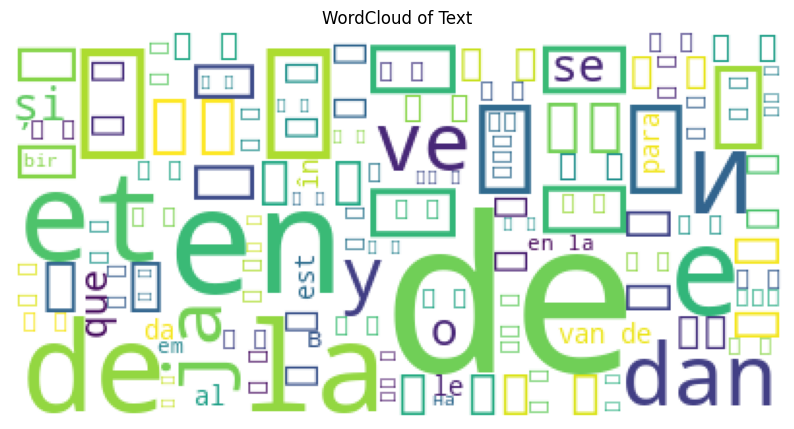

In [20]:
plt.figure(figsize = (10, 10), facecolor='white')
wc= WordCloud(background_color='white', max_words=100)
text_data = " ".join(df['Text'].astype(str))
plt.imshow(wc.generate(text_data))
plt.title("WordCloud of Text")
plt.axis("off")
plt.show()

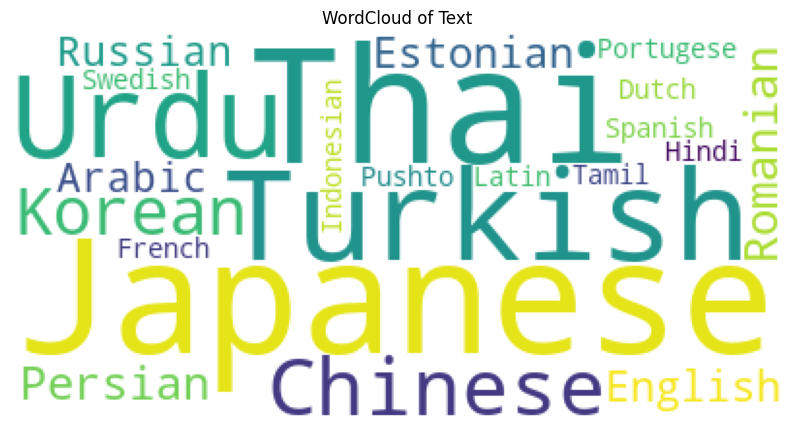

In [21]:
plt.figure(figsize = (10, 10), facecolor='white')
wc= WordCloud(background_color='white', max_words=1000)
text_data = " ".join(df['language'].astype(str))
plt.imshow(wc.generate(text_data))
plt.title("WordCloud of Text")
plt.axis("off")
plt.show()

# Text Preprocessing:

In [22]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [23]:
def preproces(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if not token.is_stop or not token.is_punct:
            filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [24]:
df['Clean_text'] = df['Text'].apply(preproces)

In [25]:
df.head()

,Text,language,Clean_text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesui...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...


# Note : Multinomial NB

`MultinomialNB` is a variant of the Naive Bayes algorithm designed for handling classification tasks with discrete features, commonly used for text classification, like spam detection or sentiment analysis. It’s especially effective in Natural Language Processing (NLP) applications because it can model word frequencies or occurrences.

### How MultinomialNB Works

1. **Probabilistic Model**:
   - The model is based on Bayes’ theorem, which calculates the probability of a class \( C \) (e.g., spam or not spam) given a feature \( X \) (e.g., word counts or term frequencies). It estimates this using:
     \[
     P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}
     \]
     Here, \( P(C|X) \) is the probability that the given text belongs to a class \( C \) given the feature \( X \).

2. **Multinomial Assumption**:
   - MultinomialNB assumes that the features follow a multinomial distribution, which is suitable for count data (like word frequencies). This assumption means the model considers each word occurrence in the document as an independent event.

3. **Feature Probability Calculation**:
   - For each class \( C \), it calculates the likelihood of each feature \( f \) (e.g., word) given that class. The probability of a word \( f \) given class \( C \) is computed as:
     \[
     P(f|C) = \frac{\text{count}(f \text{ in } C) + \alpha}{\sum_{f'} \text{count}(f' \text{ in } C) + \alpha \cdot N}
     \]
     where:
     - \( \text{count}(f \text{ in } C) \): Number of times word \( f \) appears in documents of class \( C \).
     - \( \alpha \): Smoothing parameter (typically 1), which prevents zero probabilities.
     - \( N \): Total number of possible features.

4. **Classification Decision**:
   - After calculating the probabilities of all words for each class, it combines them to estimate the probability of each class. MultinomialNB assigns the class with the highest probability to the input text, calculated as:
     \[
     P(C|X) = P(C) \prod_{i=1}^{n} P(f_i|C)^{x_i}
     \]
     where \( x_i \) is the frequency of word \( f_i \) in the document, and \( P(f_i|C) \) is the probability of \( f_i \) given class \( C \).

### Key Points
- **Smoothing**: The model uses smoothing to handle words that do not appear in the training data for a particular class. 
- **Independence Assumption**: It assumes features (words) are conditionally independent, which simplifies computation and speeds up model training.
- **Applications**: Ideal for text-based tasks like sentiment analysis, spam classification, and document categorization, where word counts or term frequencies matter.

MultinomialNB is fast, interpretable, and works well for high-dimensional sparse data, especially in text processing tasks.

1. **`alpha`** (range: 0 to infinity): Controls smoothing to avoid zero probabilities; higher values (e.g., 1 or more) add more smoothing, while values close to 0 provide little to no smoothing.

2. **`fit_prior`** (options: `True` or `False`): Determines if class probabilities are learned from data; `True` learns from data, `False` assumes all classes are equally likely.

3. **`class_prior`** (range: list of floats or `None`): Allows setting specific class probabilities; if `None`, probabilities are automatically learned from the data.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [27]:
data = ["I love data science.","I love Machine Learning."]

In [28]:
cv= CountVectorizer(stop_words='english')
vector = cv.fit_transform(data)

In [29]:
print(cv.get_feature_names_out())

['data' 'learning' 'love' 'machine' 'science']


In [30]:
print(vector.toarray())

[[1 0 1 0 1]
 [0 1 1 1 0]]


In [31]:
d1= ["My name is Muhammad Azam Khan","Muhammad Azam is data scientist."]
v1 = cv.fit_transform(d1)
print(cv.get_feature_names_out())

['azam' 'data' 'khan' 'muhammad' 'scientist']


In [32]:
print(v1.toarray())

[[1 0 1 1 0]
 [1 1 0 1 1]]


In [33]:
x = np.array(df['Clean_text'])
y= np.array(df['language'])

In [34]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


In [35]:
cv = CountVectorizer(stop_words='english')
x = cv.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42, stratify=y)

In [37]:
x_train

<15301x274891 sparse matrix of type '<class 'numpy.int64'>'
	with 614858 stored elements in Compressed Sparse Row format>

In [38]:
print(x_train)

  (0, 192556)	1
  (0, 192525)	2
  (0, 193534)	3
  (0, 193040)	1
  (0, 193104)	1
  (0, 193958)	1
  (0, 193572)	1
  (0, 193479)	2
  (0, 193812)	1
  (0, 192338)	5
  (0, 192970)	1
  (0, 192820)	2
  (0, 193449)	1
  (0, 192881)	2
  (0, 194126)	3
  (0, 193511)	1
  (0, 194105)	1
  (0, 194261)	1
  (0, 193779)	1
  (0, 193839)	1
  (0, 193879)	2
  (0, 193277)	4
  (0, 193949)	1
  (0, 192496)	1
  (0, 194010)	1
  :	:
  (15300, 61034)	3
  (15300, 29588)	1
  (15300, 87669)	2
  (15300, 46810)	1
  (15300, 95529)	2
  (15300, 18963)	1
  (15300, 66663)	1
  (15300, 17630)	1
  (15300, 83991)	1
  (15300, 82448)	1
  (15300, 28486)	1
  (15300, 37292)	1
  (15300, 93827)	2
  (15300, 8664)	1
  (15300, 96608)	1
  (15300, 95983)	1
  (15300, 84522)	1
  (15300, 93170)	1
  (15300, 83984)	1
  (15300, 18968)	2
  (15300, 18815)	1
  (15300, 84521)	1
  (15300, 20136)	1
  (15300, 90315)	1
  (15300, 18428)	1


In [39]:
model = MultinomialNB(fit_prior=True, alpha=0.5, class_prior=None)

In [40]:
model.fit(x_train, y_train)

MultinomialNB(alpha=0.5)

In [41]:
model.score(x_test, y_test)

0.9579139981701739

In [42]:
y_predict = model.predict(x_test)

`f1_score(y_test, y_predict, average='macro')` calculates the F1 score for each class separately, then averages these scores without weighting by class size. Using `macro` is beneficial when you want all classes to contribute equally, making it ideal for evaluating performance in multi-class problems where classes are balanced or where you want to avoid bias toward larger classes.

In [43]:
f1_score(y_test, y_predict, average='macro')

0.9578833191755195

Here's a concise interpretation of your classification report:

### Classification Report Summary:

- **Overall Accuracy**: 96% (indicating a high performance across all classes)
  
- **Metrics Breakdown**:
  - **Precision**: Measures the accuracy of positive predictions. A high value means that the model has a low false positive rate.
  - **Recall**: Measures the ability to find all relevant instances. A high value means the model has a low false negative rate.
  - **F1-Score**: The harmonic mean of precision and recall. A high F1-score indicates a good balance between precision and recall.

### Key Insights:
1. **High Performers**:
   - **Arabic, Dutch, Estonian, Korean, Persian, Tamil, Thai, and Urdu**: All have perfect precision and high recall, indicating strong predictive performance.
   - **French, Hindi, Indonesian, and Turkish**: Also demonstrate high scores across precision, recall, and F1-score.

2. **Moderate Performers**:
   - **Chinese and Japanese**: Lower recall for Japanese (0.88) and precision for Chinese (0.95) suggests room for improvement.
   - **English**: Lower precision (0.73) compared to recall (1.00) indicates potential over-prediction.

3. **Balanced Results**:
   - **Overall**: The model maintains a good balance, with macro and weighted averages indicating strong overall performance across all languages.

### Recommendations for Improvement:
- **Chinese and Japanese**: Investigate specific text patterns that may cause misclassification to enhance model performance for these languages.
- **English**: Consider additional data augmentation or model tuning to improve precision.

This report suggests that the model is performing well, especially on many languages, but there is still some room for enhancement, particularly in the detection of Chinese and Japanese texts.

In [44]:
cr = classification_report(y_test, y_predict)
print(f"Classification_report :\n{cr}")

Classification_report :
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       299
     Chinese       0.95      0.56      0.70       300
       Dutch       0.99      0.99      0.99       299
     English       0.73      1.00      0.84       300
    Estonian       1.00      0.98      0.99       300
      French       0.98      1.00      0.99       297
       Hindi       1.00      0.97      0.98       297
  Indonesian       0.99      0.98      0.99       292
    Japanese       0.69      0.88      0.77       300
      Korean       1.00      0.97      0.99       300
       Latin       1.00      0.92      0.96       286
     Persian       1.00      0.99      1.00       300
   Portugese       1.00      0.98      0.99       299
      Pushto       1.00      0.94      0.97       298
    Romanian       0.98      0.99      0.98       300
     Russian       0.99      0.99      0.99       300
     Spanish       0.99      0.98      0.98       299
   

In [50]:
import joblib
joblib.dump(model, "my_model.pkl")

['my_model.pkl']

In [51]:
load_model = joblib.load('my_model.pkl')

In [59]:
user = input("Enter Text Please : >")
data  = cv.transform([user]).toarray()

prediction = load_model.predict(data)
print(f"The Text you provide is belong to Language :\n{prediction}")

Enter Text Please : > یہ ایک خوبصورت دن ہے، سورج چمک رہا ہے اور پرندے گا رہے ہیں۔


The Text you provide is belong to Language :
['Urdu']


In [48]:
user = input("Enter Text Please : ")
data = cv.transform([user]).toarray()

output = model.predict(data)
print(f"The language you provide is :\n{output}")

Enter Text Please :  '한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입되었던 시기에 그와 함께 도입되었을 것으로 추정된다 씨족 사회와 그 집단을 통치하는 지배자 계급이 발생함으로써 성씨는 다른 씨족이나 피지배 계급과 구별하기 위한 목적 즉 정치적 신분을 나타내는 표지로 쓰이게 되었다'


The language you provide is :
['Korean']


In [55]:
df['Clean_text'][14]

'한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입되었던 시기에 그와 함께 도입되었을 것으로 추정된다 씨족 사회와 그 집단을 통치하는 지배자 계급이 발생함으로써 성씨는 다른 씨족이나 피지배 계급과 구별하기 위한 목적 즉 정치적 신분을 나타내는 표지로 쓰이게 되었다'

In [56]:
# df['Clean_text'][11]
df['language'][11]

'Portugese'

In [61]:
# !pip install flask